1. Assignment No: `2`
2. Enrollment No: `202126940145`
3. Student Name: `MAHARSHI TRIVEDI`
4. Course: `MSC IT DATA MANAGEMENT AND VISUAL INSIGHT (SEM - 8)`


# 1. Using Semantic Segmentation find out the segmented image.

# Import Required Libraries

In [1]:
import cv2
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.models.segmentation import deeplabv3_resnet101

In [2]:
# Load the image
image_path = '/content/cat_dog.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
# Transform image for DeepLabV3 model
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
])
input_tensor = transform(image_rgb).unsqueeze(0)

In [4]:
# Load Pretrained DeepLabV3 Model for Semantic Segmentation
model = deeplabv3_resnet101(pretrained=True)
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
100%|██████████| 233M/233M [00:02<00:00, 89.1MB/s]


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [5]:
# Perform inference
with torch.no_grad():
    output = model(input_tensor)['out'][0]
segmentation_map = output.argmax(0).byte().cpu().numpy()


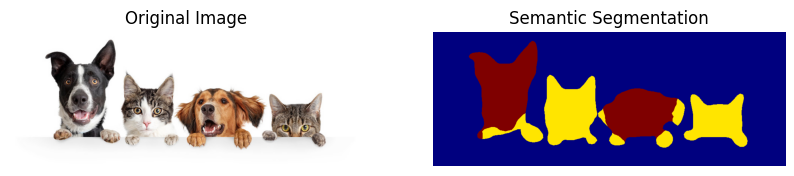

In [6]:
# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmentation_map, cmap='jet')
plt.title('Semantic Segmentation')
plt.axis('off')
plt.show()

# 2. Using Instance Segmentation find out the Instances from the image with class labels.

In [7]:
model_instance = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model_instance.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 111MB/s] 


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [8]:
# Perform inference
with torch.no_grad():
    predictions = model_instance(input_tensor)

In [9]:
# Draw bounding boxes and masks
image_result = image_rgb.copy()
for i in range(len(predictions[0]['masks'])):
    score = predictions[0]['scores'][i].item()
    if score > 0.5:
        mask = predictions[0]['masks'][i, 0].mul(255).byte().cpu().numpy()
        bbox = predictions[0]['boxes'][i].cpu().numpy().astype(int)
        label = predictions[0]['labels'][i].item()

        # Draw bounding box
        cv2.rectangle(image_result, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)

        # Overlay mask
        color = np.random.randint(0, 255, (1, 3), dtype=np.uint8)
        image_result[mask > 128] = color

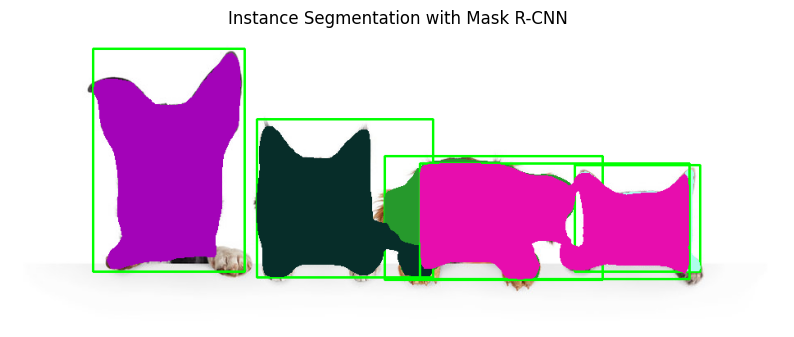

In [10]:
# Display results
plt.figure(figsize=(10, 5))
plt.imshow(image_result)
plt.title('Instance Segmentation with Mask R-CNN')
plt.axis('off')
plt.show()